### *APPLICATION OF MACHINE LEARNING IN BIOLOGICAL SYSTEMS (ES60011)*
# **Project-1**
#### Linear Regression

## Import Library
Gather all necessary libraries for data manipulation and linear regression modeling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import copy

## Load Dataset
Read the dataset into a data frame to start working with it. 

In [2]:
filepath = None
filepath = "data_insurance.csv"
df = pd.read_csv(filepath)

## Explore the Data
Get an overview of the dataset by looking at the first few rows, summary statistics, and data types.

In [3]:
print("\nHead:\n", df.head())
print("\nShape:\n", df.shape)
print("\nColumns:\n", df.columns)
print("\nDescribe:\n", df.describe())
print("\n Describe:\n", df.describe())
print("\n Data Types:\n", df.dtypes)


Head:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Shape:
 (1338, 7)

Columns:
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Describe:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max   

## Check Missing Values

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## Define Features and Target
Separate the dataset into input features (independent variables) and the target variable (dependent variable, "charges")

In [5]:
X = np.array(df.iloc[:, :-1].values)
y = np.array(df.iloc[:, -1].values)

print("Shape of X: ",X.shape, "Shape of y: ",y.shape)

Shape of X:  (1338, 6) Shape of y:  (1338,)


## Convert Categorical Variables

*Convert categorical variables like ‘sex’, ‘smoker’, and ‘region into numerical values using encoding techniques.*

In [6]:
print("\nX before encoding:")
print(X[:5])

le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])
X[:,4] = le.fit_transform(X[:,4])
X[:,5] = le.fit_transform(X[:,5])
print("\nX after encoding:")
print(X[:5])


X before encoding:
[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 [33 'male' 22.705 0 'no' 'northwest']
 [32 'male' 28.88 0 'no' 'northwest']]

X after encoding:
[[19 0 27.9 0 1 3]
 [18 1 33.77 1 0 2]
 [28 1 33.0 3 0 2]
 [33 1 22.705 0 0 1]
 [32 1 28.88 0 0 1]]


*Check for any missing values and address them appropriately, such as by filling them in or dropping rows/columns.*

In [7]:
age = X[:,0]
age = age[age != '']
age = age.astype(float)
mean_age = np.mean(age)
# print("\nMean age: ", mean_age)
X[:,0][X[:,0] == ''] = mean_age

sex = X[:,1]
values, counts = np.unique(sex, return_counts=True)
mode_sex = values[np.argmax(counts)]
# print("\nMode sex: ", mode_sex)
X[:,5][X[:,5] == ''] = mode_sex

bmi = X[:,2]
bmi = bmi[bmi != '']
bmi = bmi.astype(float)
mean_bmi = np.mean(bmi)
# print("\nMean bmi: ", mean_bmi)
X[:,2][X[:,2] == ''] = mean_bmi

children = X[:,3]
children = children[children != '']
children = children.astype(int)
mode_children = np.argmax(np.bincount(children))
# print("\nMode children: ", mode_children)
X[:,3][X[:,3] == ''] = mode_children

smoker = X[:,4]
values, counts = np.unique(smoker, return_counts=True)
mode_smoker = values[np.argmax(counts)]
# print("\nMode smoker: ", mode_smoker)
X[:,4][X[:,4] == ''] = mode_smoker

region = X[:,5]
values, counts = np.unique(region, return_counts=True)
mode_region = values[np.argmax(counts)]
# print("\nMode region: ", mode_region)
X[:,5][X[:,5] == ''] = mode_region

print("\nX before missing value imputation:")
print(X[:5])
# after filling missing values
print("\nX after missing value imputation(if any):")
print(X[:5])


X before missing value imputation:
[[19 0 27.9 0 1 3]
 [18 1 33.77 1 0 2]
 [28 1 33.0 3 0 2]
 [33 1 22.705 0 0 1]
 [32 1 28.88 0 0 1]]

X after missing value imputation(if any):
[[19 0 27.9 0 1 3]
 [18 1 33.77 1 0 2]
 [28 1 33.0 3 0 2]
 [33 1 22.705 0 0 1]
 [32 1 28.88 0 0 1]]


### *Scaling the dataset*

In [8]:
def min_max_scaler(X, feature_range=(0, 1)):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    X_scaled = (X-X_min)/(X_max-X_min)

    return X_scaled

print("\nX before scaling:")
print(X[:5])
X = X.astype(float)

X = min_max_scaler(X)
print("\nX after scaling:")
print(X[:5])


X before scaling:
[[19 0 27.9 0 1 3]
 [18 1 33.77 1 0 2]
 [28 1 33.0 3 0 2]
 [33 1 22.705 0 0 1]
 [32 1 28.88 0 0 1]]

X after scaling:
[[0.02173913 0.         0.3212268  0.         1.         1.        ]
 [0.         1.         0.47914985 0.2        0.         0.66666667]
 [0.2173913  1.         0.45843422 0.6        0.         0.66666667]
 [0.32608696 1.         0.18146355 0.         0.         0.33333333]
 [0.30434783 1.         0.34759214 0.         0.         0.33333333]]


## Split the Dataset
Divide the data into training and testing sets to evaluate the model's performance on unseen data. 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("\nX_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)


X_train shape:  (1070, 6) y_train shape:  (1070,)
X_test shape:  (268, 6) y_test shape:  (268,)


## **Train the Linear Regression Model**

## *Mean Squared Error*
### 1. Computing the Loss Function

In [10]:
def loss_function(X, y, w, b):
    m = X.shape[0]
    
    y_pred = np.dot(X, w.T) + b
    loss = np.sum((y_pred - y) ** 2) / (2 * m)
    return loss

### 2. Comptuing the Gradient of the Loss

In [11]:
def compute_gradient(X, y, w, b):
   m = X.shape[0]
   
   dL_dw = None
   dL_db = None
   
   y_pred = np.dot(X, w.T) + b
   dL_dw = np.dot((y_pred - y), X) / m
   dL_db = np.sum(y_pred - y) / m
   
   return dL_dw, dL_db

### 3. Training the Model using Batch Gradient Descent

In [12]:
def batch_gradient_descent(X, y, w_initial, b_initial, alpha, num_iters):
    loss_hist = []

    w = copy.deepcopy(w_initial) 
    b = b_initial

    for i in range(num_iters):
        dL_dw, dL_db = compute_gradient(X, y, w, b)
        w = w - alpha * dL_dw
        b = b - alpha * dL_db

        loss = loss_function(X, y, w, b)
        loss_hist.append(loss)

    return w, b, loss_hist

### 4. Initialize the parameters and the hyperparameters

In [13]:
random_seed = 17
np.random.seed(random_seed)

def initialize_parameters():
    
    initial_w = None
    initial_b = None
    alpha = None
    alpha = 0.01

    initial_w = np.random.normal(0, 1, X_train.shape[1])
    initial_b = np.random.normal(0, 1, 1)
    
    return initial_w,initial_b,alpha


In [14]:
initial_w, initial_b, alpha = initialize_parameters()
num_iters = 10000

w,b,loss_hist = batch_gradient_descent(X_train ,y_train, initial_w, initial_b, alpha, num_iters)
print("Updated w: ",w)
print("Updated b: ",b)

Updated w:  [11699.43503203   -31.18415617 11123.93077157  2171.11730011
 23545.80040017  -827.54868364]
Updated b:  [-1416.66249348]


### 5. Predicted "charges" on the test data

In [15]:
y_pred = np.dot(X_test, w.T) + b
print("\nPredicted values for first 5 samples:")
print(y_pred[:5])
print("\nActual values for first 5 samples:")
print(y_test[:5])


Predicted values for first 5 samples:
[11067.86628126  9854.82672921 37684.19872688 15922.40471753
  7326.03885068]

Actual values for first 5 samples:
[ 9724.53     8547.6913  45702.02235 12950.0712   9644.2525 ]


### 6. Final Train Error and Test Error

In [16]:
train_error = loss_function(X_train,y_train,w,b)
test_error = loss_function(X_test,y_test,w,b)
print("Train Error(MSE): ",train_error, ", Test Error(MSE): ",test_error)

Train Error(MSE):  18880857.99072353 , Test Error(MSE):  15959815.974657636


### 7. Plotting the loss function

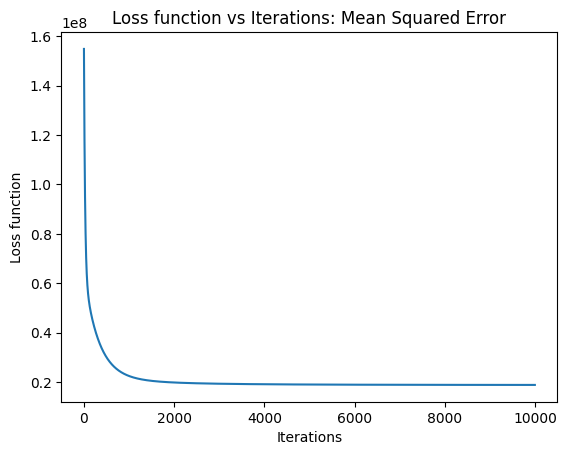

In [17]:
loss_plot = [loss_hist[i] for i in range(len(loss_hist))]
plt.title("Loss function vs Iterations: Mean Squared Error")
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.plot(loss_plot)
plt.show()

### 8. Actual Vs Predicted values

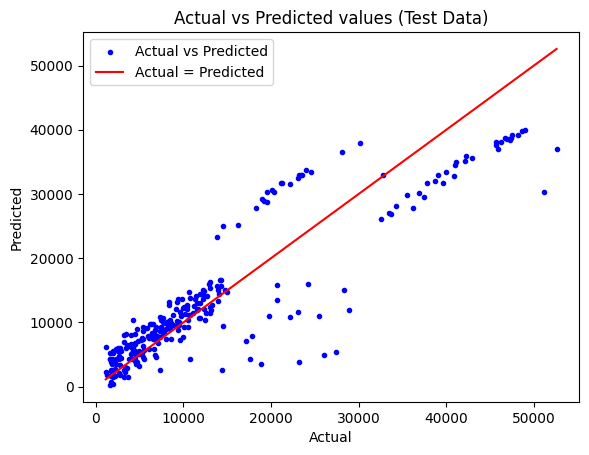

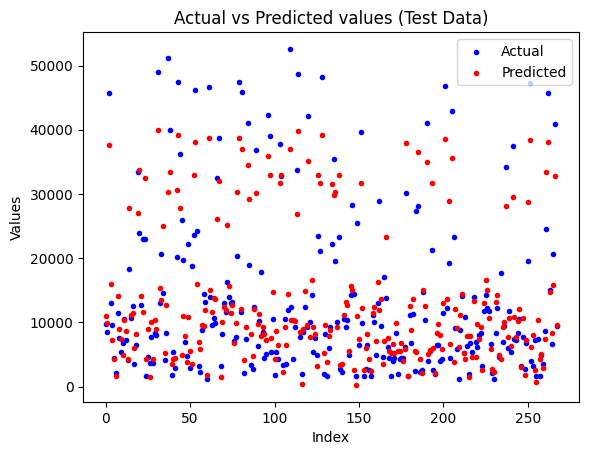

In [18]:
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted', marker='.')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Actual = Predicted')
plt.title("Actual vs Predicted values (Test Data)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

plt.scatter(range(y_test.shape[0]), y_test, color='blue', label='Actual', marker='.')
plt.scatter(range(y_test.shape[0]), y_pred, color='red', label='Predicted', marker='.')
plt.title("Actual vs Predicted values (Test Data)")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.show()

## Analyze Model Coefficients

In [19]:
print("\nFeature Coefficients:")
print("Age: ", w[0])
print("Sex: ", w[1])
print("BMI: ", w[2])
print("Children: ", w[3])
print("Smoker: ", w[4])
print("Region: ", w[5])

print("\nModel Intercept: ", b)


Feature Coefficients:
Age:  11699.43503203334
Sex:  -31.18415617310603
BMI:  11123.93077157164
Children:  2171.117300111294
Smoker:  23545.800400171647
Region:  -827.548683642712

Model Intercept:  [-1416.66249348]


### R-squared

In [20]:
def r_squared(y, y_pred):
    y_mean = np.mean(y)
    ss_total = np.sum((y - y_mean) ** 2)
    ss_res = np.sum((y - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_total)
    return r2

r2 = r_squared(y_test, y_pred)
print("\nR-squared: ", r2)



R-squared:  0.7994115534024913
